# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

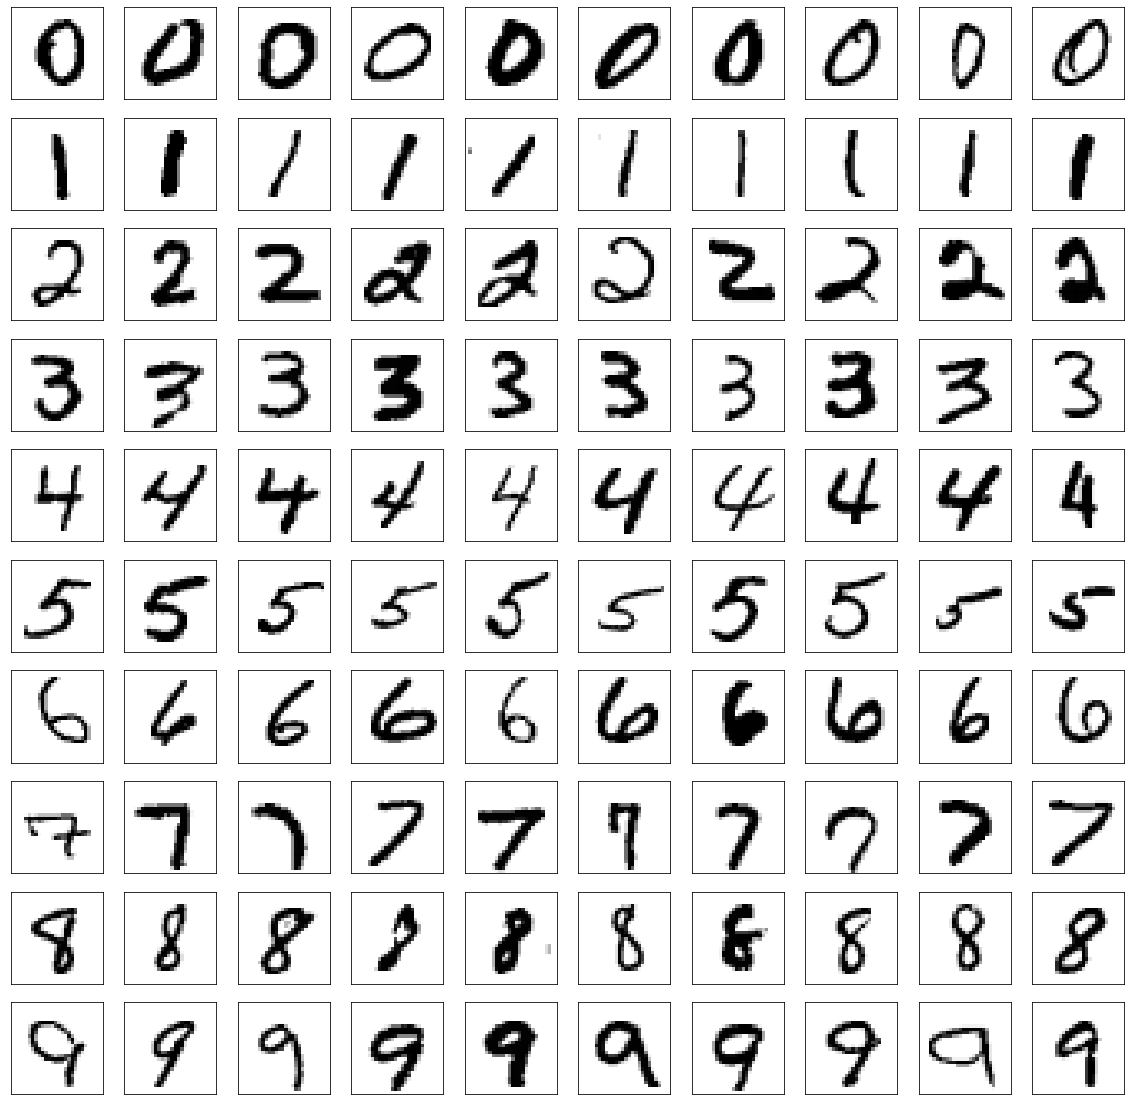

In [3]:
def P1(num_examples=10):

### STUDENT START ###
    digit_list = [] #create a list where the digits selected will be stored
    for i in range(10): #there are only 10 digits so loop for that range
        Y_boolean = Y == str(i) #we get True values for all the digits that match the digit we are looking for in this iteration
        k=0
        temp_list = []
        for j in range(len(Y)):
            if Y_boolean[j] == True: #if it is the digit we are looking for we put its index in a temporary list
                temp_list.append(j)
                k+=1
            if k>num_examples: #once we reach the number of examples we want we stop
                break
        digit_list.append(temp_list)
    
    fig, ax = plt.subplots(10, num_examples, figsize=(20,20)) #we create a grid of as many examples per digit as we specified
    for row in range(len(digit_list)):
        for dig in range(num_examples): #for as many examples as we want we reshape and plot the digit's raw data
            digit = X[digit_list[row][dig]]
            dig_rend = digit.reshape(28,28)
            ax[row,dig].imshow(dig_rend, cmap='binary')
            ax[row,dig].xaxis.set_visible(False)
            ax[row,dig].yaxis.set_visible(False)

### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

Report for KNN model with k=1 nearest neighbor(s)
Precision: 0.8853150875140509
Recall: 0.884
F1 score: 0.8832988391528966


Report for KNN model with k=3 nearest neighbor(s)
Precision: 0.8779114387352425
Recall: 0.876
F1 score: 0.8747156439900152


Report for KNN model with k=5 nearest neighbor(s)
Precision: 0.8878801339690884
Recall: 0.882
F1 score: 0.8810976260970595


Report for KNN model with k=7 nearest neighbor(s)
Precision: 0.8835657383296139
Recall: 0.877
F1 score: 0.876017682776494


Report for KNN model with k=9 nearest neighbor(s)
Precision: 0.8832351558423484
Recall: 0.875
F1 score: 0.8739897695942488




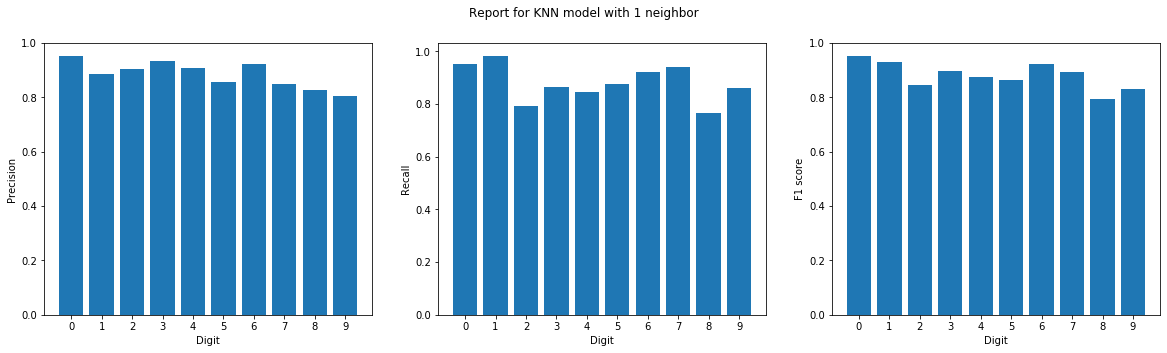

In [4]:
def P2(k_values):

### STUDENT START ###
    
    reports = []
    for i in range(len(k_values)): #for each k value specified create a model with n_neighbors = k
        model = KNeighborsClassifier(n_neighbors=k_values[i])
        model.fit(mini_train_data, mini_train_labels)
        train_predicted_labels = model.predict(dev_data)

        report = classification_report(dev_labels, train_predicted_labels, output_dict=True) #create a classification report
        reports.append(report) #append the classification report to an array of reports

    for k in range(len(reports)): #print reports for all models
        print("Report for KNN model with k=%d nearest neighbor(s)" %k_values[k])
        print("Precision:",reports[k]["weighted avg"]["precision"])
        print("Recall:",reports[k]["weighted avg"]["recall"])
        print("F1 score:",reports[k]["weighted avg"]["f1-score"])
        print("\n")

    fig, ax = plt.subplots(1,3,figsize=(20,5)) #plot report statistics for 1 neighbor model
    labels = list(reports[0].keys())[0:10]
    precision = []
    recall = []
    f1_score = []

    for l in labels: #append the precision, recall, and f1_score statistics for every digit
        precision.append(reports[0][l]["precision"])
        recall.append(reports[0][l]["recall"])
        f1_score.append(reports[0][l]["f1-score"])

    ax[0].bar(labels, precision) #plot statistics
    ax[1].bar(labels, recall)
    ax[2].bar(labels, f1_score)

    ax[0].set_xlabel("Digit")
    ax[0].set_ylabel("Precision")

    ax[1].set_xlabel("Digit")
    ax[1].set_ylabel("Recall")

    ax[2].set_xlabel("Digit")
    ax[2].set_ylabel("F1 score")

    fig.suptitle("Report for KNN model with 1 neighbor")
### STUDENT END ###
k_values = [1, 3, 5, 7, 9]
P2(k_values)

ANSWER: Given that it has the lowest precision score, the most difficult digit to classify is **9**.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

Model with 100 training samples took 0.18097591400146484 seconds to complete and has 0.702 accuracy
Model with 200 training samples took 0.2886230945587158 seconds to complete and has 0.791 accuracy
Model with 400 training samples took 0.5468759536743164 seconds to complete and has 0.811 accuracy
Model with 800 training samples took 1.0741727352142334 seconds to complete and has 0.866 accuracy
Model with 1600 training samples took 2.2722890377044678 seconds to complete and has 0.905 accuracy
Model with 3200 training samples took 4.6373069286346436 seconds to complete and has 0.927 accuracy
Model with 6400 training samples took 9.421667098999023 seconds to complete and has 0.939 accuracy
Model with 12800 training samples took 19.48414397239685 seconds to complete and has 0.952 accuracy
Model with 25600 training samples took 40.13868808746338 seconds to complete and has 0.963 accuracy


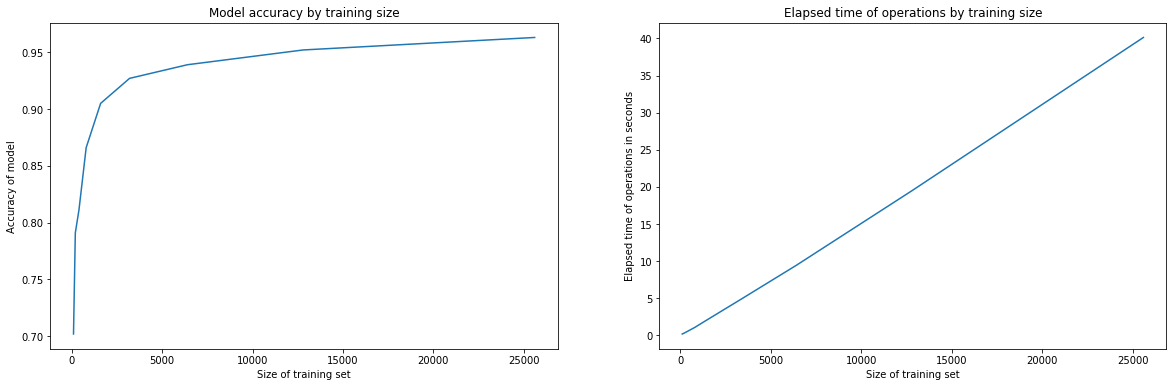

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    times = [] #create an array of operation times

    for size in train_sizes: #for all the training sizes provided, create a model and measure its accuracy and elapsed time of operations

        t1 = time.time() #start measuring time
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(train_data[:size], train_labels[:size]) #upper limit is training size provided
        train_predicted_labels = model.predict(dev_data)
        report = classification_report(dev_labels, train_predicted_labels, output_dict=True) #create a classification report
        accuracies.append(report["accuracy"]) #append model's accuracy to list of accuracies
        times.append(time.time()-t1) #append overall time of operations including model creation and classification

    fig, ax = plt.subplots(1, 2, figsize= (20, 6))
    ax[0].plot(train_sizes, accuracies) #plot accuracies
    ax[0].set_title("Model accuracy by training size")
    ax[1].plot(train_sizes, times) #plot elapsed time of operations
    ax[1].set_title("Elapsed time of operations by training size")
    
    ax[0].set_xlabel("Size of training set")
    ax[1].set_xlabel("Size of training set")

    ax[0].set_ylabel("Accuracy of model")
    ax[1].set_ylabel("Elapsed time of operations in seconds")
    
    for m in range(len(times)): #print reports
        print("Model with {} training samples took {} seconds to complete and has {} accuracy".format(train_sizes[m], times[m], accuracies[m]))
### STUDENT END ###
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.* 
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

R^2 values for model with no transformations 0.6083922057252892
R^2 values for model with logs transformation 0.6083658901052482
R^2 values for model with odds transformation 0.6089601971208708
R^2 values for model with all transformations 0.6066712600056161


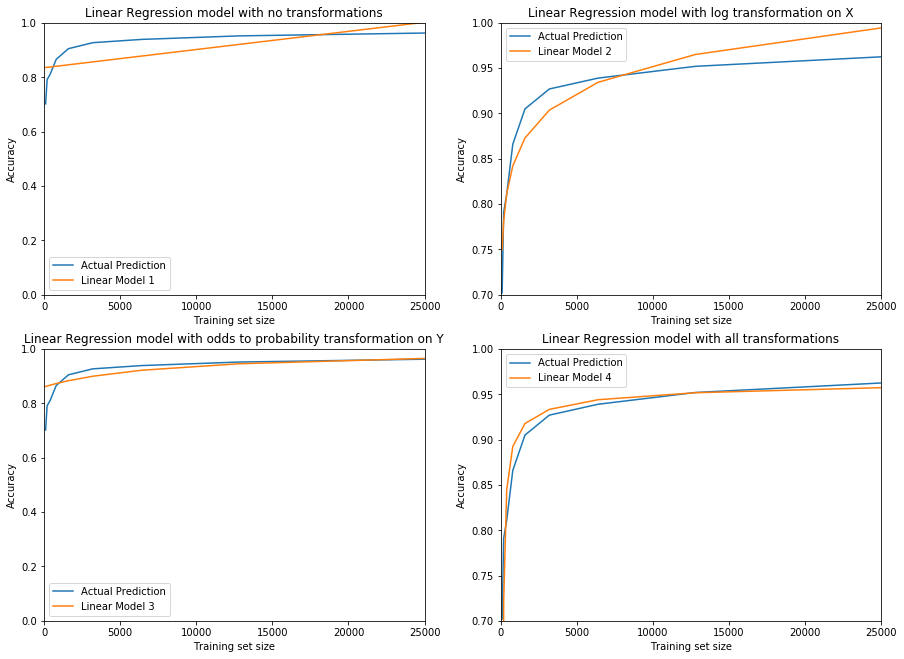

In [61]:
def P4():

### STUDENT START ###

    accuracies_r = np.reshape(accuracies, (-1, 1)) #make accuracies array into vector so that it can be inputed to model
    train_sizes_r = np.reshape(train_sizes, (-1, 1)) #make train_sizes array into vector
    train_sizes_ext = train_sizes+[60000, 120000, 1000000] #create new list of train sizes

    model_1= LinearRegression() #create a model with no transformations to data
    model_1.fit(train_sizes_r, accuracies_r)
    train_predicted_accuracies_1 = model_1.predict(np.reshape(train_sizes_ext, (-1,1)))

    model_2 = LinearRegression() #create a model with log transformation to train size data
    model_2.fit(np.log(train_sizes_r), accuracies_r)
    train_predicted_accuracies_2 = model_2.predict(np.reshape(np.log(train_sizes_ext),(-1,1)))

    model_3 = LinearRegression() #create a model with probability to odds transformation on data and then recalculate odds to probability
    model_3.fit(train_sizes_r, (accuracies_r/(1-accuracies_r)))
    train_predicted_accuracies_3 = model_3.predict(np.reshape(train_sizes_ext, (-1,1)))
    train_predicted_accuracies_3 /= (train_predicted_accuracies_3+1)

    model_4 = LinearRegression() #create a model with both aforementioned transformations
    model_4.fit(np.log(train_sizes_r), (accuracies_r/(1-accuracies_r)))
    train_predicted_accuracies_4 = model_4.predict(np.reshape(np.log(train_sizes_ext),(-1,1)))
    train_predicted_accuracies_4 /= (train_predicted_accuracies_4+1)

    print("R^2 values for model with no transformations",np.exp(model_1.score(accuracies_r, train_sizes_r))) #R^2 value for model with no transformations
    print("R^2 values for model with logs transformation",np.exp(model_2.score(accuracies_r, train_sizes_r))) #R^2 value for model with log transformation
    print("R^2 values for model with odds transformation",np.exp(model_3.score(accuracies_r, train_sizes_r))) #R^2 value for model with odds transformation
    print("R^2 values for model with all transformations",np.exp(model_4.score(accuracies_r, train_sizes_r))) #R^2 value for model with all transformations
    fig,ax = plt.subplots(2, 2, figsize=(15,11)) #plot actual and predicted accuracies vs. training set size for all models
    ax[0,0].plot(train_sizes,accuracies_r, label="Actual Prediction")
    ax[0,0].plot(train_sizes_ext,train_predicted_accuracies_1, label="Linear Model 1")
    ax[0,0].set_xlim([0,25000])
    ax[0,0].set_ylim([0,1])
    ax[0,0].set_xlabel("Training set size")
    ax[0,0].set_ylabel("Accuracy")
    ax[0,0].set_title("Linear Regression model with no transformations")
    ax[0,0].legend()

    ax[0,1].plot(train_sizes,accuracies_r, label="Actual Prediction")
    ax[0,1].plot(train_sizes_ext,train_predicted_accuracies_2, label="Linear Model 2")
    ax[0,1].set_xlim([0,25000])
    ax[0,1].set_ylim([0.7,1])
    ax[0,1].set_xlabel("Training set size")
    ax[0,1].set_ylabel("Accuracy")
    ax[0,1].set_title("Linear Regression model with log transformation on X")
    ax[0,1].legend()

    ax[1,0].plot(train_sizes,accuracies_r, label="Actual Prediction")
    ax[1,0].plot(train_sizes_ext,train_predicted_accuracies_3, label="Linear Model 3")
    ax[1,0].set_xlim([0,25000])
    ax[1,0].set_ylim([0,1])
    ax[1,0].set_xlabel("Training set size")
    ax[1,0].set_ylabel("Accuracy")
    ax[1,0].set_title("Linear Regression model with odds to probability transformation on Y")
    ax[1,0].legend()

    ax[1,1].plot(train_sizes,accuracies_r, label="Actual Prediction")
    ax[1,1].plot(train_sizes_ext,train_predicted_accuracies_4, label="Linear Model 4")
    ax[1,1].set_xlim([0,25000])
    ax[1,1].set_ylim([0.7,1])
    ax[1,1].set_xlabel("Training set size")
    ax[1,1].set_ylabel("Accuracy")
    ax[1,1].set_title("Linear Regression model with all transformations")
    ax[1,1].legend()


### STUDENT END ###

P4()

ANSWER: The problem with using regression here is that for the training set sizes not included in our data, the predictions far exceed 1.0 which is our upper bound for probability. Specifically, the model yields odds rather than probabilities, which is why in order to make it more reasonable we make an odds to probability transformation after training it on odds.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

The pair of most confused digits is 4 and 9
The classifier confuses 4 for 9
Below are said outliers


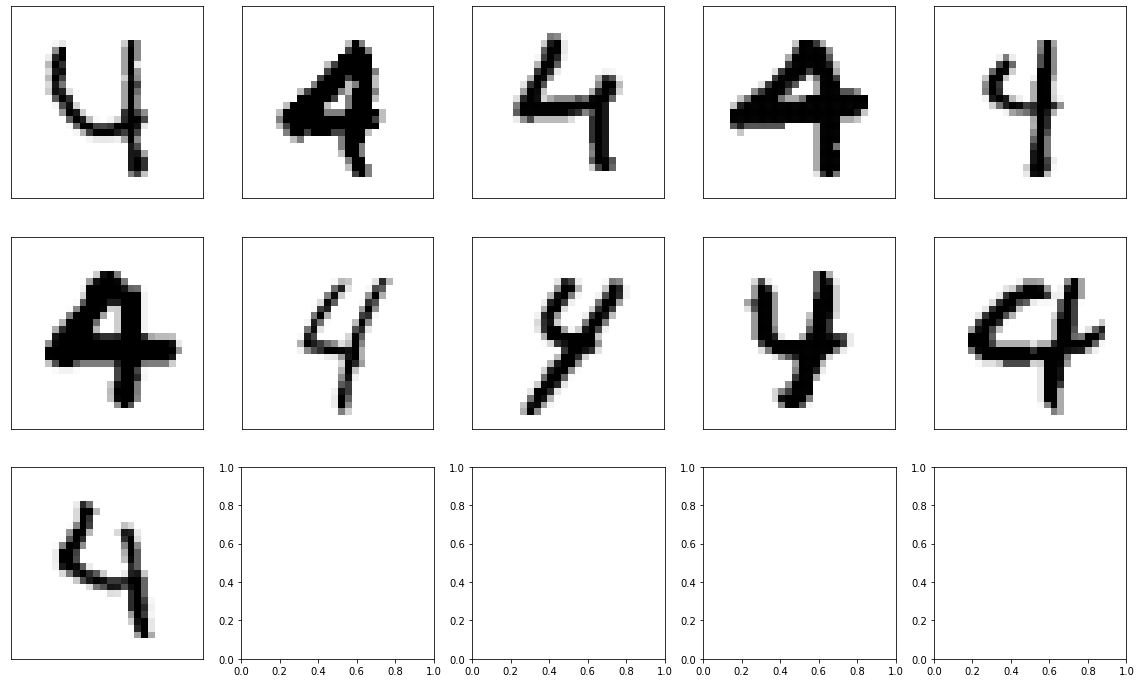

In [7]:
def P5():

### STUDENT START ###

    model = KNeighborsClassifier(n_neighbors=1) #create model with 1 neighbor
    model.fit(mini_train_data, mini_train_labels) #train on mini training set
    train_predicted_labels = model.predict(dev_data) #predict on development set

    confusion_mat = np.array(confusion_matrix(dev_labels, train_predicted_labels)) #create a confusion matrix of the actual dev set labels and the predicted labels
    for i in range(len(confusion_mat)): 
        for j in range(len(confusion_mat)):
            if i==j: #we set the diagonal values to -1 because we only care about digits misclassified
                confusion_mat[i][j] = -1
    result = np.where(confusion_mat == np.amax(confusion_mat)) #we find the coordinates of the misclassified digits, where x is the true value and y is the digit it was mistaken for
    coordinates = list(zip(result[0], result[1]))

    misclassified = [] 
    for i in range(len(mini_train_labels)):
        if int(dev_labels[i])==coordinates[0][0] and int(train_predicted_labels[i])==coordinates[0][1]:
            misclassified.append(dev_data[i]) #we append the raw data of the instances that were misclassified

    print("The pair of most confused digits is {} and {}".format(int(result[0]), int(result[1])))
    print("The classifier confuses {} for {}".format(int(result[0]), int(result[1])))
    print("Below are said outliers")

    fig, ax = plt.subplots((len(misclassified)//5+1),5,figsize=(20,12))
    for digit in range(len(misclassified)): #we display the images of the digits that were misclassified
        digit_rend = misclassified[digit].reshape(28,28)
        ax[digit//5,digit%5].imshow(digit_rend, cmap = "binary")
        ax[digit//5,digit%5].xaxis.set_visible(False)
        ax[digit//5,digit%5].yaxis.set_visible(False)
### STUDENT END ###

P5()

ANSWER: The model most often confuses the digit 4 for the digit 9.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [8]:
def P6():
    
### STUDENT START ###
    def filter_set(s, a=0.8): #This blurring function takes in a set s and a blur rate a which represents the weight of neighboring values
        filtered = []
        for d in range(len(s)): #iterate over every digit in our set
            digit = (s[d].copy()).reshape(28,28) #make a copy of the original digit so we don't end up altering our data
            for row in range(len(digit)): #for every row in the digit
                for p in range(len(digit[row])): #for every feature (pixel) in the row
                    edge = len(digit[0])-1 #edge represents the index of the last row/feature in our square image
                    if row==0 and p==0: #if our pixel is the top left pixel in our image then it has only 3 neighbors
                        k = (digit[row][p+1]+digit[row+1][p]+digit[row+1][p+1])/3
                    elif row==edge and p==0: #if our pixel is the bottom left pixel it has only 3 neighbors 
                        k = (digit[row][p+1]+digit[row-1][p]+digit[row-1][p+1])/3
                    elif row==0 and p==edge: #if our pixel is the top right pixel it has only 3 neighbors
                        k = (digit[row][p-1]+digit[row+1][p]+digit[row+1][p])/3
                    elif row==edge and p==edge: #if our pixel is the bottom right pixel it has only 3 neighbors
                        k = (digit[row-1][p-1]+digit[row-1][p]+digit[row][p-1])/3
                    elif row==0: #if our pixel is in the top row, it has only 5 surrounding pixels
                        k = (digit[row][p-1]+digit[row][p+1]+
                        digit[row+1][p-1]+digit[row+1][p]+digit[row+1][p+1])/5
                    elif row==edge: #if our pixel is in the bottom row, it has only 5 surrounding pixels
                        k = (digit[row-1][p-1]+digit[row-1][p]+digit[row-1][p+1]+
                        digit[row][p-1]+digit[row][p+1])/5
                    elif p == 0: #if our pixel is in the leftmost column, it has only 5 surrounding pixels
                        k = (digit[row-1][p]+digit[row-1][p+1]+
                        digit[row][p+1]+
                        digit[row+1][p]+digit[row+1][p+1])/5
                    elif p == edge: #if our pixel is in the rightmost column, it has only 5 surrounding pixels
                        k = (digit[row-1][p-1]+digit[row-1][p]+
                        digit[row][p-1]+
                        digit[row+1][p-1]+digit[row+1][p])/5
                    else: #if our pixel does not belong to any of the previous subcategories, it has 8 neighboring pixels
                        k = (digit[row-1][p-1]+digit[row-1][p]+digit[row-1][p+1]+
                        digit[row][p-1]+digit[row][p+1]+
                        digit[row+1][p-1]+digit[row+1][p]+digit[row+1][p+1])/8

                    blurred = (1-a)*digit[row][p] + a*k #the final value of our pixel is going to be the weighted sum of the original value and the neighboring values
                    digit[row][p] = blurred

            filtered.append(digit.reshape(784)) #digits are reshaped to be inputted to model
        return np.array(filtered)

    #By running the lines below I estimated that accuracy is maximized for alpha (blur rate) = 0.86 when blurring is applied to the training set only
    # xs = np.linspace(0,1,100)
    # ys = []
    # for alpha in xs:
    #     mini_filtered = filter_set(mini_train_data, alpha)
    #     model_1 = KNeighborsClassifier(n_neighbors=1)
    #     model_1.fit(mini_filtered, mini_train_labels)
    #     predicted_labels_1 = model_1.predict(dev_data)
    #     ys.append(classification_report(predicted_labels_1, dev_labels, output_dict=True)["accuracy"])

    # print("Optimal alpha rate: ", xs[ys.index(max(ys))])

    #Model 0 | Baseline model
    model_0 = KNeighborsClassifier(n_neighbors=1)
    model_0.fit(mini_train_data, mini_train_labels)
    predicted_labels_0 = model_0.predict(dev_data)
    print("Baseline model accuracy:",classification_report(predicted_labels_0, dev_labels, output_dict=True)["accuracy"])

    #Model 1 | Model with filtered training data
    mini_filtered = filter_set(mini_train_data, a=0.86)
    model_1 = KNeighborsClassifier(n_neighbors=1)
    model_1.fit(mini_filtered, mini_train_labels)
    predicted_labels_1 = model_1.predict(dev_data)
    print("Model with filtered training set accuracy:",classification_report(predicted_labels_1, dev_labels, output_dict=True)["accuracy"])

    #Model 2 | Model with filtered dev set
    dev_filtered = filter_set(dev_data, a=0.86)
    model_2 = KNeighborsClassifier(n_neighbors=1)
    model_2.fit(mini_train_data, mini_train_labels)
    predicted_labels_2 = model_2.predict(dev_filtered)
    print("Model with filtered dev set accuracy:", classification_report(predicted_labels_2, dev_labels, output_dict=True)["accuracy"])

    #Model 3 | Model with filtered training and dev sets
    model_3 = KNeighborsClassifier(n_neighbors=1)
    model_3.fit(mini_filtered, mini_train_labels)
    predicted_labels_3 = model_3.predict(dev_filtered)
    print("Model with filtered training and dev sets accuracy:", classification_report(predicted_labels_3, dev_labels, output_dict=True)["accuracy"])

### STUDENT END ###

P6()

Baseline model accuracy: 0.884
Model with filtered training set accuracy: 0.9
Model with filtered dev set accuracy: 0.871
Model with filtered training and dev sets accuracy: 0.908


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [16]:
def P7():

### STUDENT START ###

    #Model 1: Binary data
    nb_model = BernoulliNB(binarize=0.1) #create a Naive Bayes model and binarize the training data with a threshold of 0.1 / any pixel with value >=0.1 becomes 1 or 0 in the opposite case
    nb_model.fit(mini_train_data, mini_train_labels) #fit the data
    predicted_labels_nb = nb_model.predict(dev_data) #get predicted labels

    print("Model 1 accuracy:",classification_report(predicted_labels_nb, dev_labels, output_dict=True)["accuracy"])

    def preprocess_multi(data, a1, a2): #this function gets two parameters a1 and a2, and assigns the values 0,1, and 2 accordingly
        new_data = []
        for digit in data: #for all the digits in our data set
            new = []
            for pixel in digit: #for all the pixels in the digit
                if pixel<a1: #if the pixel's value is less than a1, the pixel's value becomes 0
                    pixel = 0
                elif pixel>=a2: #if the pixel's value is more than a2, the pixel's value become 2
                    pixel = 2
                else: #the pixel's value becomes 1 otherwise
                    pixel = 1
                new.append(pixel)
            new_data.append(new) 
        return np.array(new_data) #returns a new array of digits

    mini_gray = preprocess_multi(mini_train_data, 0.1, 0.9)

    #Model 2: Multinomial
    nb_model_2 = MultinomialNB() #create a Multinomial Naive Bayes model
    nb_model_2.fit(mini_gray, mini_train_labels) #fit grayscale data to model
    predicted_labels_nb_2 = nb_model_2.predict(dev_data) #get predicted labels

    print("Model 2 accuracy:",classification_report(predicted_labels_nb_2, dev_labels, output_dict=True)["accuracy"])

### STUDENT END ###

P7()

Model 1 accuracy: 0.814
Model 2 accuracy: 0.807


ANSWER: The multinomial model's accuracy is a bit worse than the bernoulli model's accuracy. The multinomial model fails to improve our existing accuracy because grayscale data has 3 classes whereas binary data has 2 classes only. This increases the uncertainty of the model as where there existed 2^28 possible pixel configurations before, there are now 3^28. In essence, if there was one way each feature could be miscategorized before, there are now 2 ways.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?


Best alpha =  {'alpha': 0.001}


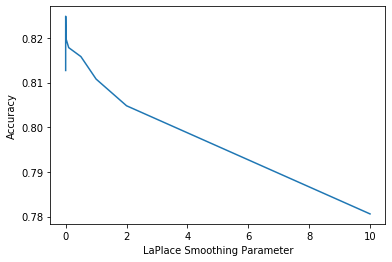

In [21]:
def P8(alphas):

### STUDENT START ###
    nb_model = BernoulliNB() #create a Naive Bayes model
    cv = GridSearchCV(nb_model, alphas, cv=5, scoring='accuracy', iid=False) #create a Cross-validation grid on the model, with 5 folds, and scoring on accuracy
    cv.fit(mini_train_data, mini_train_labels) #fit data to the CV grid
    
    plt.plot(cv.cv_results_['param_alpha'],cv.cv_results_["mean_test_score"]) #plot the relationship between alpha and accuracy
    plt.ylabel("Accuracy")
    plt.xlabel("LaPlace Smoothing Parameter")
    return cv

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

ANSWER: The best value for alpha is 0.001. As we can see in the plot above, when alpha is close to 0 the accuracy is almost maximized. I did not expect the model to maximize for such a (previously considered) negligible value of the Laplace smoothing parameter.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [25]:
def P9():
    
# ### STUDENT END ###

    #Model before fix

    model_gnb_1 = GaussianNB() #create a Gaussian Naive Bayes Model
    model_gnb_1.fit(mini_train_data, mini_train_labels) #fit data
    predicted_gnb_1 = model_gnb_1.predict(dev_data) #predict data
    print("Model accuracy before fix:",classification_report(dev_labels, predicted_gnb_1, output_dict=True)["accuracy"])

    #Fix to find the value of the var_smoothing parameter that maximizes accuracy

    model_gnb_test = GaussianNB() #create a Gaussian Naive Bayes Model
    var_params = {"var_smoothing": np.linspace(0.01,0.5,1000)} #create an array of possible var_smoothing values
    var_cv = GridSearchCV(model_gnb_test, var_params) #create a cross-validation grid to search for the best var_smoothing value
    var_cv.fit(mini_train_data, mini_train_labels) #fit data to the cross-validation grid
    max_smooth = var_cv.best_params_ #get the var_smoothing that maximizes the model's accuracy
    print("Best var_smoothing value:", max_smooth)

    #Model after fix

    model_gnb_2 = GaussianNB(var_smoothing=max_smooth["var_smoothing"]) #create a Gaussian Naive Bayes Model
    model_gnb_2.fit(mini_train_data, mini_train_labels) #fit data
    predicted_gnb_2 = model_gnb_2.predict(dev_data) #predict labels
    print("Model accuracy after fix:",classification_report(dev_labels, predicted_gnb_2, output_dict=True)["accuracy"])

# ### STUDENT END ###

P9()

Model accuracy before fix: 0.593


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best var_smoothing value: {'var_smoothing': 0.0565965965965966}
Model accuracy after fix: 0.819


ANSWER: Gaussian Naive Bayes works most effectively with data that follow a Gaussian (normal) distribution. This is not the case with our data since it is composed of pixel data and not some type of measurement that adheres to the central limit theorem. Therefore, we must apply some kind of transformation to our data, which is done using the var_smoothing parameter of the GaussianNB model. Essentially, what this smoothing parameter does is artificially increase the variance of the model we are fitting. In other words it is "widening" the normal curve that the model assumes, thereby allowing for data that falls outside of this curve to be included. To find the value of artificial variance smoothing that maximizes the accuracy of our model, I test the accuracy for 1000 var_smoothing parameter values in the range 0.01 to 0.5. I then create a model using the maximum value, which yields an accuracy of 0.819.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

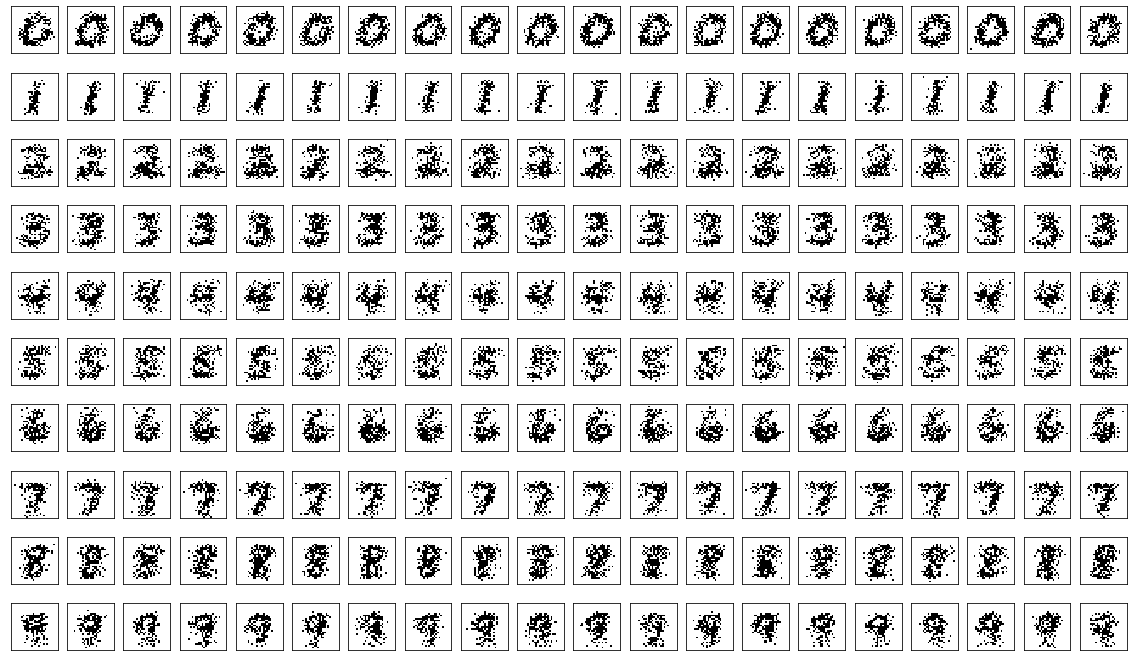

In [31]:
def P10(num_examples):

### STUDENT START ###
    gen_model = BernoulliNB(binarize=0.1) #create a generative Bernoulli Naive Bayes model
    gen_model.fit(train_data, train_labels) #train on train set

    new_digits = []
    for i in range(10): #for all classes in our data set
        for j in range(num_examples): #for num_examples many examples
            gen_digit = []
            for k in range(len(gen_model.feature_log_prob_[i])): #for all features in digit
                prob = np.exp(gen_model.feature_log_prob_[i][k]) #get the probability that the pixel feature is equal to 1
                larger = np.random.rand() < prob #get a random number from 0 to 1 and compare it to the probability from above
                gen_digit.append(int(larger)) #if the random number from above is larger than our probability, the generated pixel gets value 1 or 0 otherwise
            new_digits.append(gen_digit) #add generated digit to list of digits


    new_digits_np = np.array(new_digits)
    fig, ax = plt.subplots(10,num_examples, figsize=(20,12))

    for i in range(10): #plot all digits in our set
        for k in range(num_examples):
            ax[i][k].imshow(new_digits_np[i*20+k].reshape(28,28), cmap="binary")
            ax[i][k].xaxis.set_visible(False)
            ax[i][k].yaxis.set_visible(False)
### STUDENT END ###

P10(20)

ANSWER: The generated digits really resemble the training digits though they are less precise. There are quite a few pixels that seem to have been misclassified in the generation process, thus making the pictures look a bit "fuzzy". Perhaps using the smoothing from Q6 would remedy this issue.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [32]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    model_bnb = BernoulliNB(alpha=2) #create a Bernoulli Naive Bayes model with LaPlace smoothing parameter equal to 2
    model_bnb.fit(mini_train_data, mini_train_labels) #fit data
    predicted_labels_bnb = model_bnb.predict(dev_data) #predict labels

    bucketed_data = [[] for i in buckets] #create an array to store the indices of data belonging to the pre-set buckets

    for d in range(len(dev_data)): #for all the data in the dev set
        prob = np.exp(model_bnb.predict_log_proba(dev_data)[d][int(predicted_labels_bnb[d])]) #get the probability that the digit belongs to its predicted class
        bucket_num = 0 
        bucket_found = False
        i=0
        while bucket_found!=True and i<len(buckets): #find the bucket to which the probability belongs and add the digit's index in the respective bucket inside the array defined above
            if prob <= buckets[i]:
                bucket_num = i 
                bucket_found = True 
            else:
                i+=1
        bucketed_data[bucket_num].append(d) #add data to respective bucket

    for b in range(len(bucketed_data)): #for all buckets in array
        for d in (bucketed_data[b]): #for all digit indices in bucket
            total[b]+=1 #add 1 to the total digits for this bucket
            if predicted_labels_bnb[d] == dev_labels[d]: #if the predicted label of the digit matches the actual label, add 1 to correct predictions for bucket
                correct[b]+=1
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  37    accuracy = 0.486
p(pred) is 0.9000000000000 to 0.9990000000000    total =  63    accuracy = 0.381
p(pred) is 0.9990000000000 to 0.9999900000000    total =  77    accuracy = 0.506
p(pred) is 0.9999900000000 to 0.9999999000000    total =  62    accuracy = 0.645
p(pred) is 0.9999999000000 to 0.9999999990000    total =  56    accuracy = 0.643
p(pred) is 0.9999999990000 to 0.9999999999900    total =  50    accuracy = 0.800
p(pred) is 0.9999999999900 to 0.9999999999999    total =  54    accuracy = 0.778
p(pred) is 0.9999999999999 to 1.0000000000000    total = 601    accuracy = 0.952


ANSWER: The classifier we are implementing has higher accuracy score for the bucket with 50-90% probability than that with 90-99% probability. Furthermore, the classifier has accuracy significantly lower than 90% in the range from 90% up to the last bucket. Lastly, accuracy does not seem to follow a stable trend with respect to probability but instead falls from 80% to 77.8% and then goes up to 95.2% for the last three buckets. For all these reasons, I would argue that this classifier is weakly to poorly callibrated.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()